<a href="https://colab.research.google.com/github/Muhammad-Abdullah-Jami/UK_Bank_Stocks_Prediction/blob/main/Yfinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installation of essential Libraries**

In [1]:
!pip install yfinance


**Importing Libraries**

In [60]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


# Standard Chartered (STAN.L)

**Data Loading and preprocessing**

In [70]:
# Fetching data for Standard Chartered (STAN.L)
ticker = "STAN.L"
df = yf.download(ticker, start="2019-01-01", end="2024-01-01")

# Date index in datetime formatfor graph
df.index = pd.to_datetime(df.index)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,STAN.L,STAN.L,STAN.L,STAN.L,STAN.L,STAN.L
Date,,,,,,
2019-01-02 00:00:00+00:00,501.606323,606.400024,607.700012,584.099976,596.000000,4442051
2019-01-03 00:00:00+00:00,485.310577,586.700012,610.799988,582.700012,596.599976,7359146
2019-01-04 00:00:00+00:00,502.764282,607.799988,611.200012,596.000000,597.400024,7283237
2019-01-07 00:00:00+00:00,491.845398,594.599976,609.599976,590.900024,606.900024,7184535
2019-01-08 00:00:00+00:00,507.065643,613.000000,623.500000,593.599976,596.799988,7575939


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1261 entries, 2019-01-02 00:00:00+00:00 to 2023-12-29 00:00:00+00:00
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   (Adj Close, STAN.L)  1261 non-null   float64
 1   (Close, STAN.L)      1261 non-null   float64
 2   (High, STAN.L)       1261 non-null   float64
 3   (Low, STAN.L)        1261 non-null   float64
 4   (Open, STAN.L)       1261 non-null   float64
 5   (Volume, STAN.L)     1261 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 69.0 KB


In [46]:
df.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,STAN.L,STAN.L,STAN.L,STAN.L,STAN.L,STAN.L
count,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1.261000e+03
mean,512.525411,567.990634,575.304779,560.508252,567.368439,7.753292e+06
std,104.083527,111.144439,111.080875,110.804058,110.558282,3.894145e+06
min,299.323364,336.799988,346.862000,334.250000,340.700012,6.793360e+05
25%,419.479309,466.100006,473.700012,459.200012,465.700012,5.175427e+06
50%,521.905273,585.599976,593.000000,578.599976,586.799988,6.721285e+06
75%,590.401428,661.000000,667.200012,654.200012,659.599976,9.140959e+06
max,750.497864,790.799988,799.400024,784.400024,790.400024,3.080891e+07


In [47]:
df.isnull().sum()

,,0
Price,Ticker,
Adj Close,STAN.L,0
Close,STAN.L,0
High,STAN.L,0
Low,STAN.L,0
Open,STAN.L,0
Volume,STAN.L,0


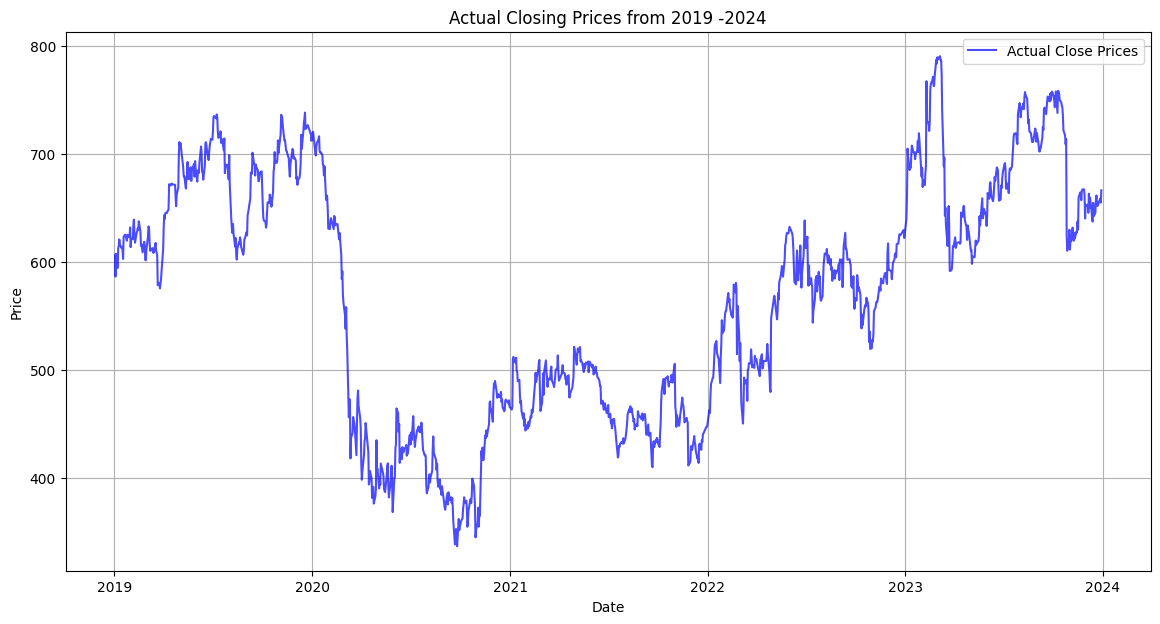

In [74]:
df.reset_index(inplace=True)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.set_index('Date', inplace=True)

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Actual Close Prices', color='blue', alpha=0.7)

# Adding titles and labels
plt.title("Actual Closing Prices from 2019 -2024")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


**Feature Engineering**

In [76]:
# Testing feature engineering code

# window size and alpha for moving averages
window_size = 20  # 20-day SMA
alpha = 0.5

df['CMA_Close'] = df['Close'].expanding().mean()
df['SMA_Close'] = df['Close'].rolling(window=window_size).mean()
df['EMA_Close'] = df['Close'].ewm(alpha=alpha, min_periods=window_size).mean()


**Plotiing the Feature Engineering**

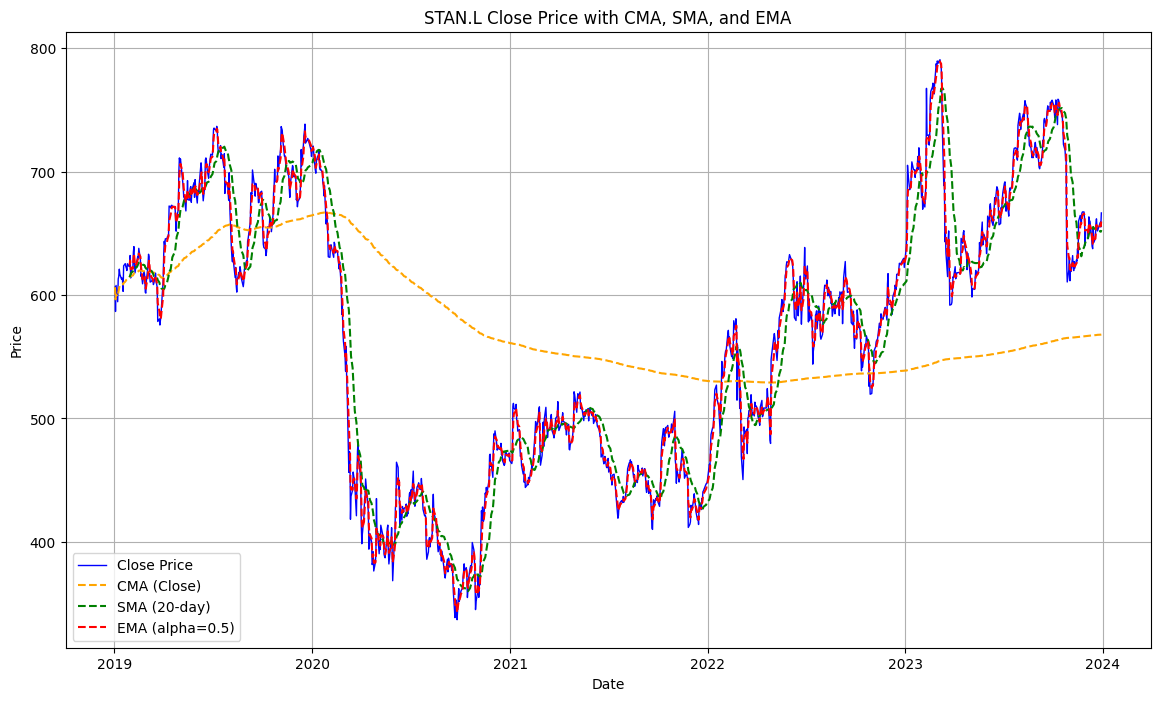

In [77]:
# Plotting Close prices along with CMA, SMA, and EMA
plt.figure(figsize=(14, 8))

plt.plot(df.index, df['Close'], label='Close Price', color='blue', linewidth=1)
plt.plot(df.index, df['CMA_Close'], label='CMA (Close)', color='orange', linestyle='--')
plt.plot(df.index, df['SMA_Close'], label=f'SMA ({window_size}-day)', color='green', linestyle='--')
plt.plot(df.index, df['EMA_Close'], label=f'EMA (alpha={alpha})', color='red', linestyle='--')

plt.title('STAN.L Close Price with CMA, SMA, and EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)


plt.show()

## Random Forest Rregessor and classifier

**Random Forest**

In [78]:
df.index = pd.to_datetime(df.index)
future_data.columns = X.columns
# for binary classification: 1 if the price goes up, 0 if it goes down
df['Target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
df = df.iloc[:-1]
X = df[['Open', 'High', 'Low', 'Close', 'Volume']]
y = df['Target']
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Random Forest model training
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(days=1), periods=12, freq='M')
future_data = pd.DataFrame(index=future_dates, columns=X.columns)
for col in X.columns:
    future_data[col] = df[col].iloc[-1]

# storing prediction for year 2025
future_predictions_1y = rf_model.predict(future_data)

# Evaluation
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)


print("Model Performance Metrics")
print("-" * 30)
print(f"Mean Squared Error (MSE):       {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE):      {mae:.4f}")
print("-" * 30)


Model Performance Metrics
------------------------------
Mean Squared Error (MSE):       0.2875
Root Mean Squared Error (RMSE): 0.5362
Mean Absolute Error (MAE):      0.4986
------------------------------


<ipython-input-78-f6c2546c9a49>:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(days=1), periods=12, freq='M')


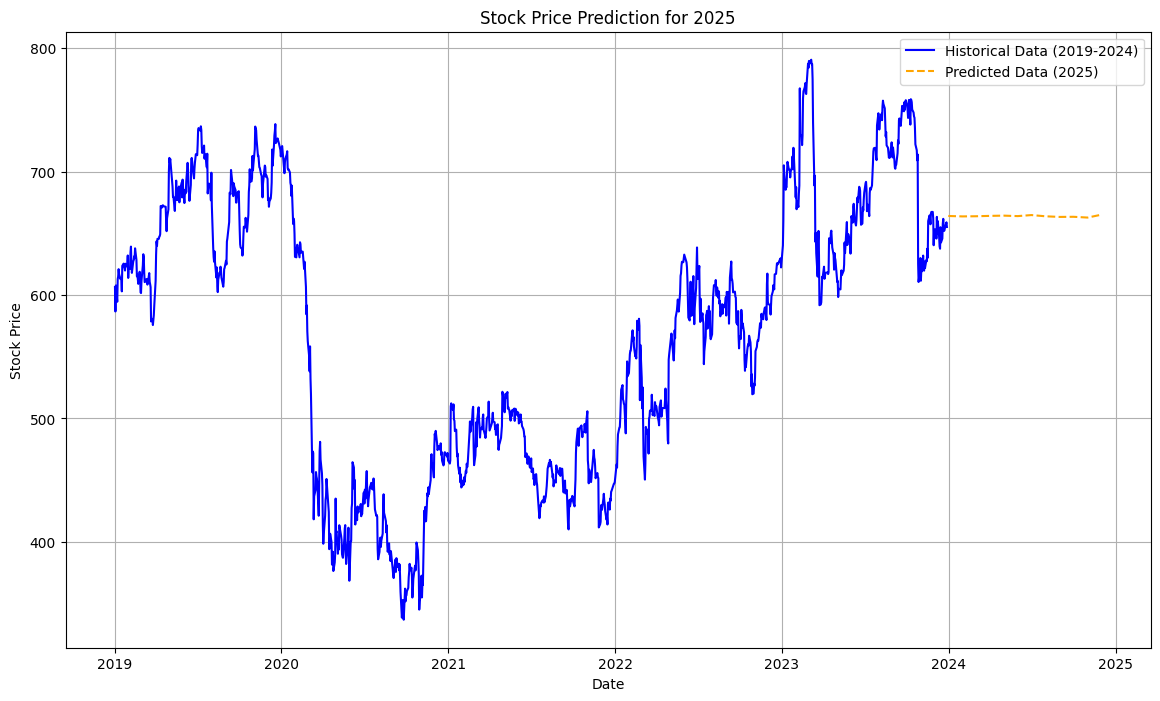

In [79]:

# Ploting the origanal historical (2019-2024) and the predicted (2025) data
plt.figure(figsize=(14, 8))
plt.plot(df.index, df['Close'], label='Historical Data (2019-2024)', color='blue')
plt.plot(predicted_2025.index, predicted_2025['Close'], label='Predicted Data (2025)', color='orange', linestyle='--')

plt.title('Stock Price Prediction for 2025')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


**Using random forest classifier to just predict weather it goes up ir down**

Accuracy: 0.5436507936507936
The stock price is predicted to go DOWN.
Columns in df_combined: Index([('Close', 'STAN.L'), 'Predicted'], dtype='object')


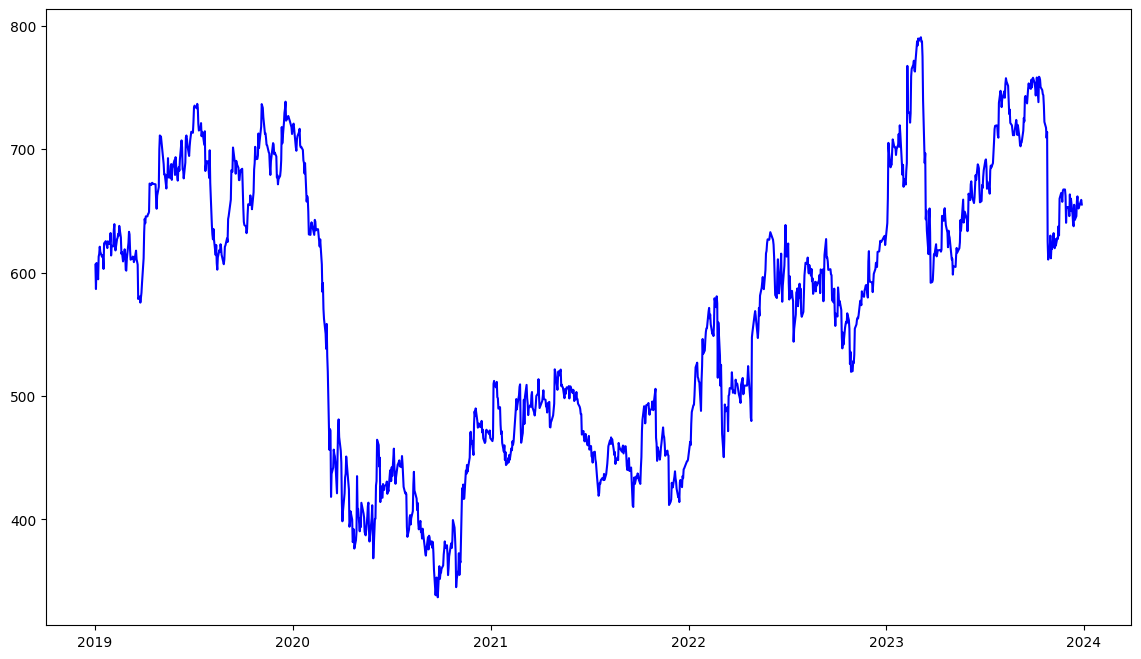

In [82]:
df['Target'] = np.where(df[('Close', 'STAN.L')].shift(-1) > df[('Close', 'STAN.L')], 1, 0)
X = df[['CMA_Close', 'SMA_Close', 'EMA_Close']].iloc[:-1]
y = df['Target'].iloc[:-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest classifier training
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Prediction for the next day
next_day_data = X.iloc[-1].values.reshape(1, -1)
next_day_prediction = rf_classifier.predict(next_day_data)

if next_day_prediction == 1:
    print("The stock price is predicted to go UP.")
else:
    print("The stock price is predicted to go DOWN.")

# Prediction for the next year
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(days=1), periods=365, freq='D')
future_predictions = pd.DataFrame(index=future_dates, columns=['Predicted_Trend'])

last_known_values = X.iloc[-1].copy()

# consective prediction for the next year
for i in range(len(future_dates)):
    future_predictions.iloc[i] = rf_classifier.predict(last_known_values.values.reshape(1, -1))

    last_known_values['CMA_Close'] += 0.5 * (1 if future_predictions.iloc[i]['Predicted_Trend'] == 1 else -0.5)
    last_known_values['SMA_Close'] += 0.5 * (1 if future_predictions.iloc[i]['Predicted_Trend'] == 1 else -0.5)
    last_known_values['EMA_Close'] += 0.5 * (1 if future_predictions.iloc[i]['Predicted_Trend'] == 1 else -0.5)


df_combined = pd.concat([df[[('Close', 'STAN.L')]], future_predictions.rename(columns={'Predicted_Trend': 'Predicted'})], axis=1)
print("Columns in df_combined:", df_combined.columns)

# DataFrame for predicted trends
if ('Close', 'STAN.L') in df_combined.columns:
    df_combined['Predicted_Price'] = df_combined[('Close', 'STAN.L')] + (df_combined['Predicted'].shift(1) * 0.5)
else:
    print("Column 'Close' is missing in df_combined.")

plt.figure(figsize=(14, 8))
plt.plot(df.index, df[('Close', 'STAN.L')], label='Historical Data (2019-2024)', color='blue')

Accuracy: 0.5396825396825397
F1 Score: 0.5394795650543683


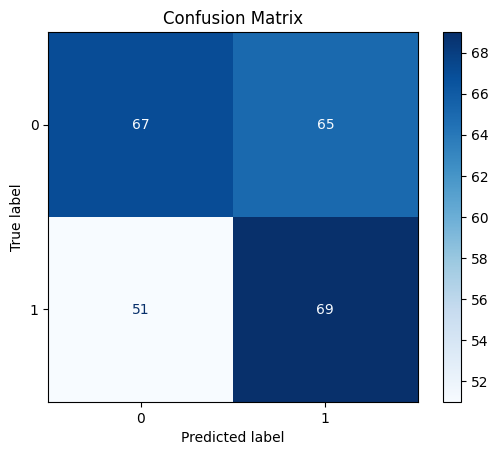

In [69]:
# creating bins for the continue and discreate data seprations for plottinh
bins = np.linspace(y_test.min(), y_test.max(), 10)

y_test_binned = np.digitize(y_test, bins)
y_pred_binned = np.digitize(y_pred, bins)

# Calculating the  accuracy  and F1 score from binned values
accuracy = accuracy_score(y_test_binned, y_pred_binned)
f1 = f1_score(y_test_binned, y_pred_binned, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

# Confusion Matrix
cm = confusion_matrix(y_test_binned, y_pred_binned)

# Ploting the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


## LSTM

**Extra code for better isight for data or preprocessing or model**

In [ ]:
# Calculating the number of years
start_year = df.index[0].year
end_year = df.index[-1].year
years_of_data = end_year - start_year + 1

print(f"Years of data: {years_of_data}")


In [ ]:
# Fetching data for Standard Chartered (STAN.L)
ticker = "STAN.L"
stock = yf.Ticker(ticker)

#Stock metadata
metadata = stock.info
metadata


{'address1': '1 Basinghall Avenue',
 'city': 'London',
 'zip': 'EC2V 5DD',
 'country': 'United Kingdom',
 'phone': '44 20 7885 8888',
 'fax': '44 20 7885 9999',
 'website': 'https://www.sc.com',
 'industry': 'Banks - Diversified',
 'industryKey': 'banks-diversified',
 'industryDisp': 'Banks - Diversified',
 'sector': 'Financial Services',
 'sectorKey': 'financial-services',
 'sectorDisp': 'Financial Services',
 'longBusinessSummary': 'Standard Chartered PLC, together with its subsidiaries, provides various banking products and services in Asia, Africa, the Middle East, Europe, and the Americas. The company operates in three segments: Corporate, Commercial & Institutional Banking; Consumer, Private & Business Banking; and Ventures. It offers retail products, such as deposits, mortgages, credit cards, and personal loans; wealth management products and services that include investments, portfolio management, insurance, and wealth advice; and transaction banking services, such as cash mana

In [19]:
# Fetching data for Standard Chartered (STAN.L)
ticker = "STAN.L"
df = yf.download(ticker, start="2019-01-01", end="2024-01-01")

# Ensure 'Date' is set as index in datetime format
df.index = pd.to_datetime(df.index)


[*********************100%***********************]  1 of 1 completed
